In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Load the dataset
df = pd.read_csv('/Users/gracewang/dev/DSI_Team_Project_Bank_Marketing/data/processed/df_processed1.csv')  

# Separate features (X) and target (y)
X = df.drop(columns=['y'])  
y = df['y']

In [7]:
y.describe()

count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [8]:
from imblearn.over_sampling import SMOTE

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled can be used for model training

In [9]:
# Standardize features to ensure all variables are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Choose the number of neighbors (k)
k = 5

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [11]:
# Predict the target for the test set
y_pred = knn.predict(X_test_scaled)

In [12]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:")
print(accuracy)

Confusion Matrix:
[[10464  1502]
 [  677   921]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     11966
           1       0.38      0.58      0.46      1598

    accuracy                           0.84     13564
   macro avg       0.66      0.73      0.68     13564
weighted avg       0.87      0.84      0.85     13564


Accuracy:
0.8393541728103804


In [13]:
# Test different k values
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_resampled)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

Accuracy for k=1: 0.8518136242996166
Accuracy for k=2: 0.8681067531701563
Accuracy for k=3: 0.8453995871424359
Accuracy for k=4: 0.8580064877617222
Accuracy for k=5: 0.8393541728103804
Accuracy for k=6: 0.8530669419050427
Accuracy for k=7: 0.8379534060749042
Accuracy for k=8: 0.8483485697434385
Accuracy for k=9: 0.836773813034503
Accuracy for k=10: 0.8462105573577116


In [14]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(knn, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.9171028962199615


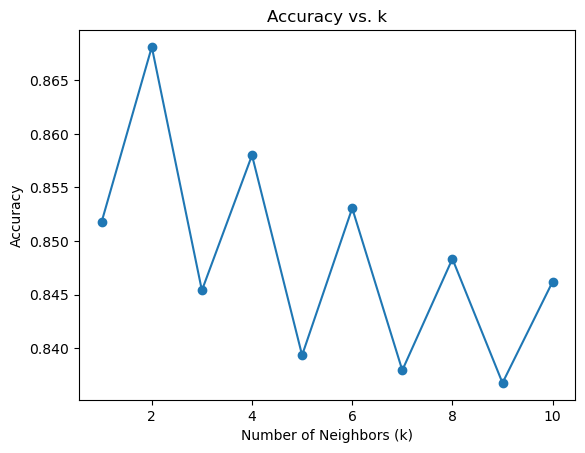

In [15]:
import matplotlib.pyplot as plt
k_values = range(1, 11)
accuracies = [0.8518136242996166, 0.8681067531701563, 0.8453995871424359, 0.8580064877617222,
              0.8393541728103804, 0.8530669419050427, 0.8379534060749042, 0.8483485697434385,
              0.836773813034503, 0.8462105573577116]

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()


In [16]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train_scaled, y_train_resampled)


KNeighborsClassifier(n_neighbors=2, weights='distance')

In [17]:
# Choose the number of neighbors (k)
k = 2

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(n_neighbors=2)

In [18]:
# Predict the target for the test set
y_pred = knn.predict(X_test_scaled)

In [19]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:")
print(accuracy)

Confusion Matrix:
[[11151   815]
 [  974   624]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11966
           1       0.43      0.39      0.41      1598

    accuracy                           0.87     13564
   macro avg       0.68      0.66      0.67     13564
weighted avg       0.86      0.87      0.87     13564


Accuracy:
0.8681067531701563
